# Note book for analysis CHEMBL target info

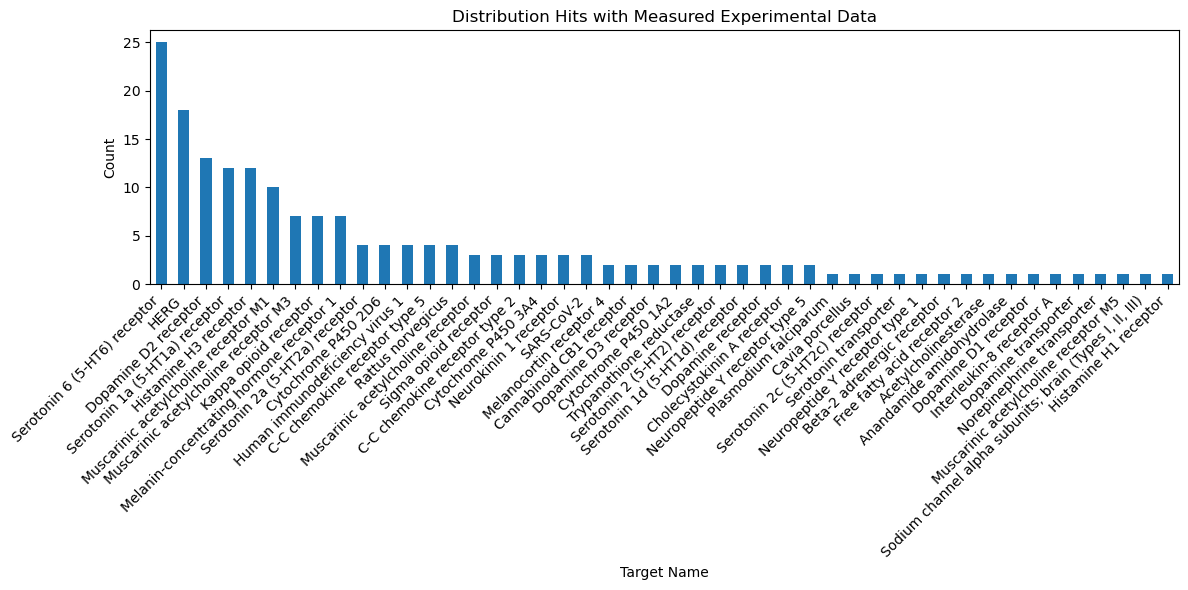

<Figure size 640x480 with 0 Axes>

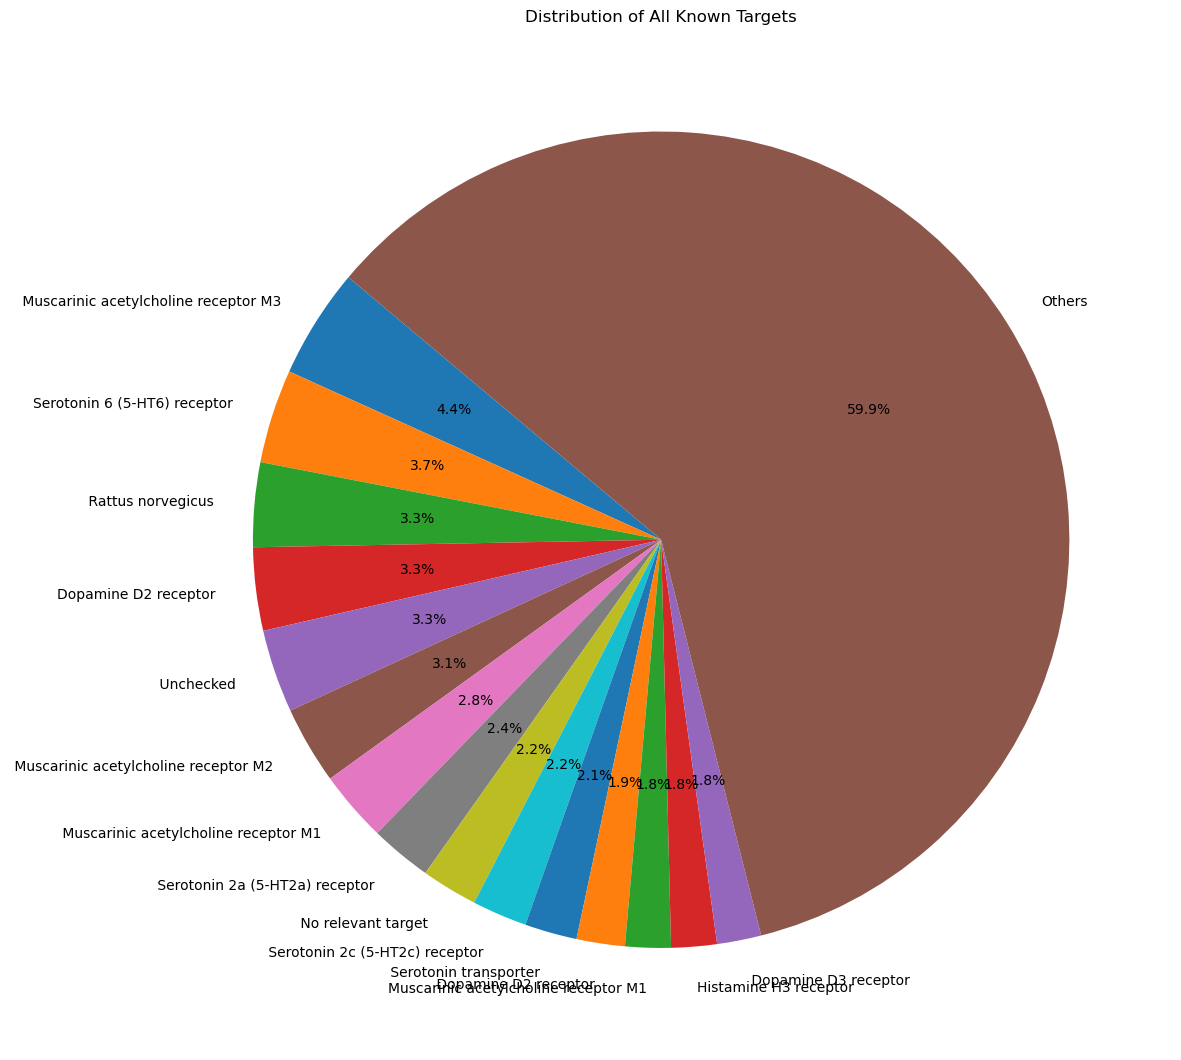

Total occurrences of 'Muscarinic' across all entries: 369
Number of entries containing 'Muscarinic': 156
Distribution of Muscarinic counts per entry:
all_known_targets
0    421
1     66
2     28
3     21
4     25
5     13
6      2
7      1
Name: count, dtype: int64
Top 20 rows with the lowest affinity_pred_value:
                                            model_path  model_index  \
183  ./boltz_results_567706_CHEMBL/predictions/5677...            0   
374  ./boltz_results_11382_CHEMBL/predictions/11382...            0   
100  ./boltz_results_233132_CHEMBL/predictions/2331...            0   
128  ./boltz_results_177399_CHEMBL/predictions/1773...            0   
418  ./boltz_results_334947_CHEMBL/predictions/3349...            0   
549  ./boltz_results_565881_CHEMBL/predictions/5658...            0   
254  ./boltz_results_565880_CHEMBL/predictions/5658...            0   
441  ./boltz_results_1039712_CHEMBL/predictions/103...            0   
37   ./boltz_results_11231_CHEMBL/predictions/

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

input_file = ("Final_Filtered_models_with_ChemBL.csv")

# Read and load CSV file into a DataFrame
df = pd.read_csv(input_file)

# Firstly collate all the target_name data which has the measured experimental data
target_name_data = df['target_name'].value_counts()

# plot the target_name data as a bar chart
plt.figure(figsize=(12, 6))
target_name_data.plot(kind='bar')
plt.title('Distribution Hits with Measured Experimental Data')
plt.xlabel('Target Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('target_name_distribution.png')

# Collated all the data from the 'all_known_targets' column
all_known_targets_data = df['all_known_targets']

# all_known_targets_data is delimited by ';' so we need to split it and count occurrences
all_known_targets_data = all_known_targets_data.dropna().str.split(';').explode().value_counts()

# Need to curate this a little, plot only the top 15 targets and group the rest as 'others'
if len(all_known_targets_data) > 15:
    others_count = all_known_targets_data[15:].sum()
    all_known_targets_data = all_known_targets_data[:15]
    all_known_targets_data['Others'] = others_count

# plot as a pie chart
plt.figure(figsize=(12, 12))
all_known_targets_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of All Known Targets')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()
plt.savefig('all_known_targets_distribution.png')


# Count how many times "Muscarinic" appears in each entry of 'all_known_targets' column
muscarinic_counts = df['all_known_targets'].fillna('').str.count('Muscarinic')
total_muscarinic_occurrences = muscarinic_counts.sum()
entries_with_muscarinic = (muscarinic_counts > 0).sum()

print(f"Total occurrences of 'Muscarinic' across all entries: {total_muscarinic_occurrences}")
print(f"Number of entries containing 'Muscarinic': {entries_with_muscarinic}")
print(f"Distribution of Muscarinic counts per entry:")
print(muscarinic_counts.value_counts().sort_index())


# Sort the dataframe by the affinity_pred_value in ascending order and print the top 20 rows
sorted_df = df.sort_values(by='affinity_pred_value', ascending=True)
print("Top 20 rows with the lowest affinity_pred_value:")
print(sorted_df.head(20))

# output sorted dataframe to a new CSV file
output_file = Path(input_file).stem + '_sorted_by_affinity_pred_value.csv'
sorted_df.to_csv(output_file, index=False)  
